In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import time

In [3]:
# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1, warm_start=True)

# Function to simulate online data stream
def online_data_stream(n_samples=1000, n_features=2):
    for _ in range(n_samples):
        X, y = make_classification(n_samples=1, n_features=n_features, n_informative=n_features, n_redundant=0, random_state=None)
        yield X[0], y[0]

In [4]:
# Generate and process the online data stream
n_samples = 1000
test_accuracy_list = []
for i, (X_i, y_i) in enumerate(online_data_stream(n_samples=n_samples)):
    X_i = X_i.reshape(1, -1)
    y_i = np.array([y_i])

    # Update the model with the current data point
    perceptron.partial_fit(X_i, y_i, classes=np.array([0, 1]))

    # Every 100 samples, evaluate the model on a new batch of data
    if (i + 1) % 100 == 0:
        X_test, y_test = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
        test_score = perceptron.score(X_test, y_test)
        test_accuracy_list.append(test_score)
        print(f"Processed {i + 1} samples, Test accuracy: {test_score:.4f}")
        time.sleep(1)  # Simulate delay in data arrival

Processed 100 samples, Test accuracy: 0.5000
Processed 200 samples, Test accuracy: 0.5000
Processed 300 samples, Test accuracy: 0.5400
Processed 400 samples, Test accuracy: 0.5400
Processed 500 samples, Test accuracy: 0.5400
Processed 600 samples, Test accuracy: 0.6000
Processed 700 samples, Test accuracy: 0.6000
Processed 800 samples, Test accuracy: 0.5150
Processed 900 samples, Test accuracy: 0.5900
Processed 1000 samples, Test accuracy: 0.5000


In [ ]:
# Final evaluation after all samples are processed
print("Final Test Accuracies:", test_accuracy_list)

# Task
Visualize the accuracy of the online learning process and experiment with different parameters of the Perceptron model to observe their effect on accuracy.

## Visualize accuracy

### Subtask:
Plot the `test_accuracy_list` to see how the model's accuracy changes over time.


**Reasoning**:
Plot the `test_accuracy_list` to visualize the model's accuracy over time following the instructions.



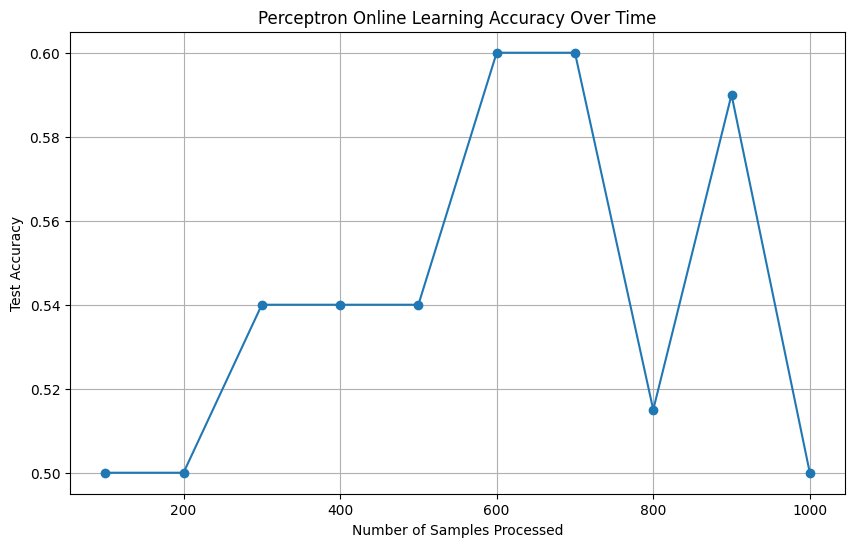

In [5]:
import matplotlib.pyplot as plt

# Create the x-axis values (number of samples processed)
samples_processed = [(i + 1) * 100 for i in range(len(test_accuracy_list))]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(samples_processed, test_accuracy_list, marker='o', linestyle='-')
plt.xlabel('Number of Samples Processed')
plt.ylabel('Test Accuracy')
plt.title('Perceptron Online Learning Accuracy Over Time')
plt.grid(True)
plt.show()

## Experiment with parameters

### Subtask:
Modify the Perceptron parameters and rerun the online learning process to observe the effect on accuracy.


**Reasoning**:
Initialize a new Perceptron model with different parameters and re-run the online learning process to collect accuracies.



In [6]:
# Initialize a new Perceptron model with different parameters
# Example: changing eta0 (learning rate) and adding a penalty
perceptron_new_params = Perceptron(max_iter=1, warm_start=True, eta0=0.01, penalty='l2', alpha=0.001)

# Re-run the online learning simulation
test_accuracy_list_new_params = []
for i, (X_i, y_i) in enumerate(online_data_stream(n_samples=n_samples)):
    X_i = X_i.reshape(1, -1)
    y_i = np.array([y_i])

    # Update the new model with the current data point
    perceptron_new_params.partial_fit(X_i, y_i, classes=np.array([0, 1]))

    # Every 100 samples, evaluate the new model on a new batch of data
    if (i + 1) % 100 == 0:
        X_test, y_test = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
        test_score_new_params = perceptron_new_params.score(X_test, y_test)
        test_accuracy_list_new_params.append(test_score_new_params)
        print(f"Processed {i + 1} samples with new params, Test accuracy: {test_score_new_params:.4f}")
        time.sleep(1) # Simulate delay in data arrival

# Final evaluation after all samples are processed
print("Final Test Accuracies with new params:", test_accuracy_list_new_params)

Processed 100 samples with new params, Test accuracy: 0.5150
Processed 200 samples with new params, Test accuracy: 0.5150
Processed 300 samples with new params, Test accuracy: 0.5450
Processed 400 samples with new params, Test accuracy: 0.5450
Processed 500 samples with new params, Test accuracy: 0.5450
Processed 600 samples with new params, Test accuracy: 0.5450
Processed 700 samples with new params, Test accuracy: 0.5450
Processed 800 samples with new params, Test accuracy: 0.5450
Processed 900 samples with new params, Test accuracy: 0.5450
Processed 1000 samples with new params, Test accuracy: 0.6600
Final Test Accuracies with new params: [0.515, 0.515, 0.545, 0.545, 0.545, 0.545, 0.545, 0.545, 0.545, 0.66]


## Compare results

### Subtask:
Visualize and compare the accuracy curves for different parameter settings.


**Reasoning**:
Visualize and compare the accuracy curves for different parameter settings by plotting both accuracy lists on the same graph.



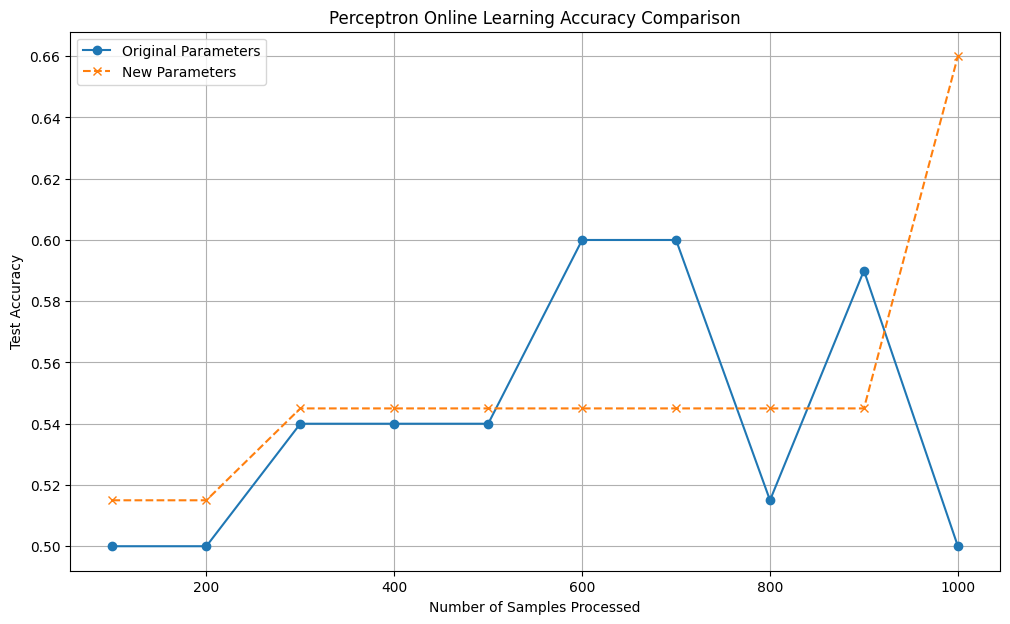

In [7]:
# Create the x-axis values (number of samples processed)
samples_processed = [(i + 1) * 100 for i in range(len(test_accuracy_list))]

# Create a figure and axes for the plot
plt.figure(figsize=(12, 7))

# Plot the original accuracy list
plt.plot(samples_processed, test_accuracy_list, marker='o', linestyle='-', label='Original Parameters')

# Plot the new accuracy list
plt.plot(samples_processed, test_accuracy_list_new_params, marker='x', linestyle='--', label='New Parameters')

# Add legend, labels, and title
plt.legend()
plt.xlabel('Number of Samples Processed')
plt.ylabel('Test Accuracy')
plt.title('Perceptron Online Learning Accuracy Comparison')
plt.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The online learning process of the Perceptron model shows a trend in test accuracy as more samples are processed.
*   Experimenting with different Perceptron parameters (e.g., `eta0=0.01`, `penalty='l2'`, `alpha=0.001`) resulted in a different accuracy curve compared to the original parameters during the online learning simulation.
*   Visual comparison of the accuracy curves allows for observation of how parameter changes affect the model's performance over time in an online learning setting.

### Insights or Next Steps

*   Further experimentation with a wider range of parameter combinations (e.g., different learning rates, penalty types, and alpha values) is needed to understand their full impact on online learning accuracy.
*   Investigating the stability and convergence speed of accuracy for different parameter sets could provide insights into the robustness of the online learning process.
